1. Нужно сгенерировать файл, содержащий 5000 32-битных случайных целых чисел, каждое число на отдельной строке. 

In [1]:
import random

def random_32bit_int():
    return random.randint(0, 2**31 - 1)

with open('random_numbers_5000.txt', 'w') as f:
    for _ in range(5000):
        f.write(str(random_32bit_int()) + '\n')

Простым последовательным алгоритмом


2. Посчитать, какое суммарное количество простых множителей присутствует при факторизации всех чисел.  Например, пусть всего два числа: 6 и 8. 
6 = 2 * 3, 8 = 2 * 2 * 2. Ответ 5.  

In [1]:
def prime_factors(n):
    i = 2
    factors = 0
    while i * i <= abs(n): 
        if n % i:
            i += 1
        else:
            n //= i
            factors += 1
    if n > 1:
        factors += 1
    return factors

In [2]:
%%time
with open('random_numbers_5000.txt', 'r') as f:
    numbers = [int(line.strip()) for line in f]
    total_factors = sum(prime_factors(n) for n in numbers)

print(total_factors)

20601
CPU times: total: 4.45 s
Wall time: 4.64 s


(В файле task2.py) Многопоточно (на CPython - multiprocessing), с использованием примитивов синхронизации 

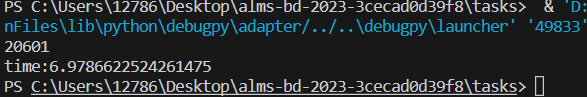

С помощью Ray/Dask/PySpark

In [3]:
%%time
import numpy as np
import ray

if ray.is_initialized():
    ray.shutdown()

ray.init()

@ray.remote
def prime_factors(n):
    i = 2
    factors = 0
    while i * i <= abs(n):
        if n % i:
            i += 1
        else:
            n //= i
            factors += 1
    if n > 1:
        factors += 1
    return factors

with open('random_numbers_5000.txt', 'r') as f:
    num_list = [int(line.strip()) for line in f]

data_split = np.array_split(np.array(num_list), 4)
futures = [prime_factors.remote(data) for subset in data_split for data in subset]
results = ray.get(futures)

print(np.sum(results))
ray.shutdown()

2023-06-12 03:30:19,451	INFO worker.py:1636 -- Started a local Ray instance.


20601
CPU times: total: 4.48 s
Wall time: 25.8 s
